In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report,confusion_matrix

In [2]:
data = pd.read_csv('weatherHistory.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# Data Details

## Here we find that data is null or not , data types, data duplicates so we can clean the data accordingly.

In [3]:
def initial_EDA():
    print("Summary \n\n", data.info())
    print("\n--------------------------------------------\n")
    print("Shape\n\n", data.shape)
    print("\n--------------------------------------------\n")
    print("Data Types\n\n", data.dtypes)
    print("\n--------------------------------------------\n")
    print("Any Duplicate Values?\n\n", data.duplicated().sum())
    print("\n--------------------------------------------\n")
    print("Empty Values Total \n\n", data.isnull().sum())
    print("\n--------------------------------------------\n")
    print("Non-empty values Total \n\n", data.notnull().sum())
    print("\n--------------------------------------------\n")
    print("Columns names\n\n", data.columns)
    print("\n--------------------------------------------\n")
    print("Unique Values\n\n", data.nunique())
    print("\n--------------------------------------------\n")
initial_EDA()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB
Summary 

 None

--------------------------------------------

Shape


[Text(0.5, 23.52222222222222, 'Columns'),
 Text(50.722222222222214, 0.5, 'Null Values'),
 Text(0.5, 1.0, 'Heatmap of null values in the data')]

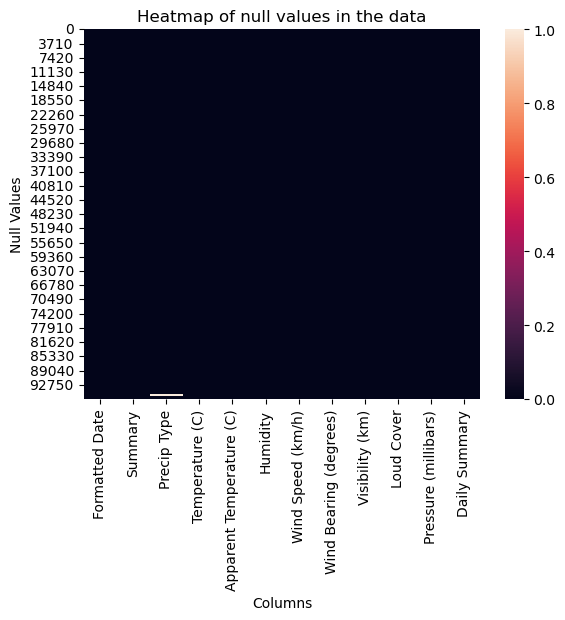

In [4]:
s = sns.heatmap(data.isnull())
s.set(xlabel='Columns', ylabel='Null Values', title = 'Heatmap of null values in the data')

## Here there is no null value is present in the dataset. There is minor null value but it will not affect the weather prediction. Also we can remove it but it will not change anything.

In [5]:
timestamp = data['Formatted Date'].str.split(' ',expand=True)
data[['Date', 'Time']] = timestamp[[0,1]]
data.drop(columns =["Time"], inplace = True)
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
 12  Date                      96453 non-null  object 
dtypes: float64(8), object(5)
memory usage: 9.6+ MB


In [7]:
data['Date'] = pd.to_datetime(data['Date'])

In [8]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [9]:
data = data.dropna()
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date,Year,Month,Day
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01,2006,4,1
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01,2006,4,1
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01,2006,4,1
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01,2006,4,1
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01,2006,4,1


In [10]:
data.shape

(95936, 16)

# Precip Type

In [11]:
le = LabelEncoder()
encoded = le.fit_transform(data['Precip Type'])
print(encoded) # 0 : Rain , 1: Snow

[0 0 0 ... 0 0 0]


In [12]:
data.drop("Precip Type", axis=1, inplace=True)
data["Precip Type"] = encoded 

In [13]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  
        sharex=True,  
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,)  
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins) if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2) 
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--") 
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-") 

In [14]:
numeric_columns = list(data.select_dtypes(include=['float64', 'int64']).columns)

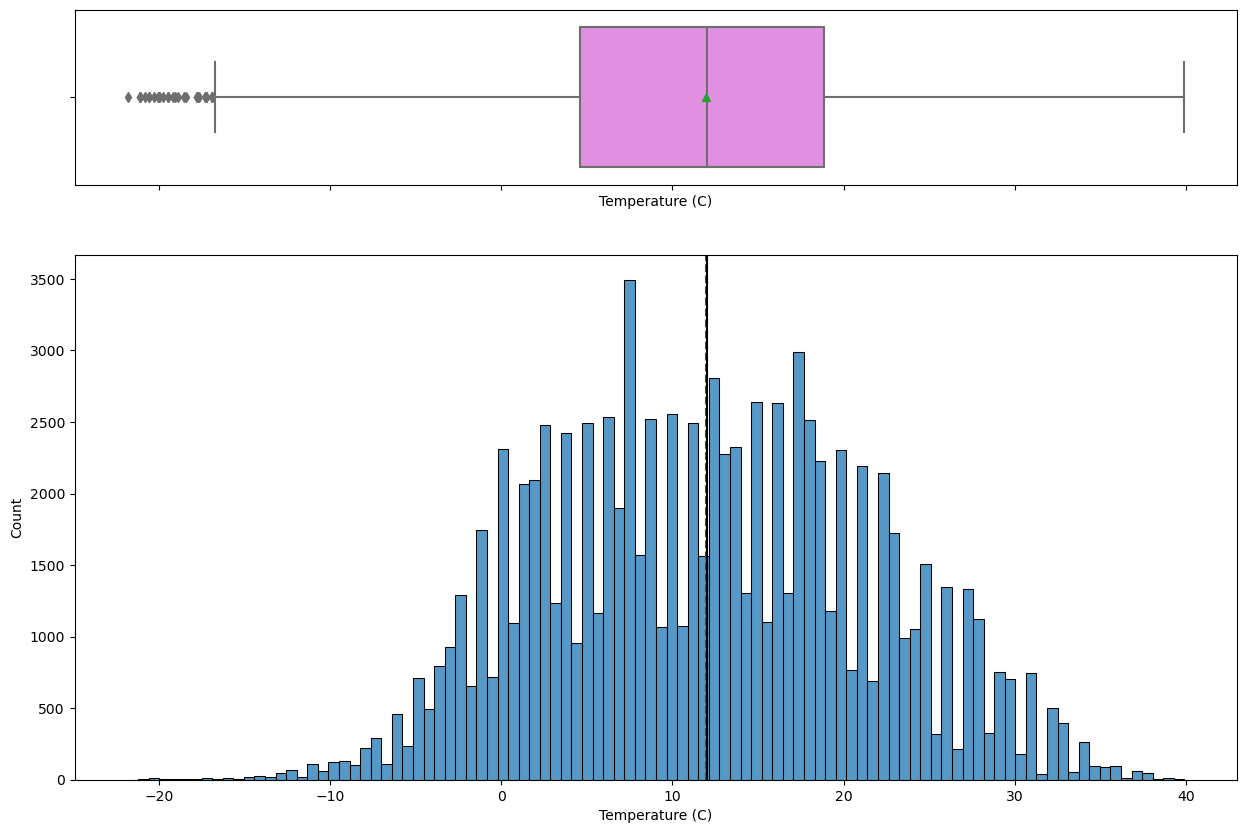

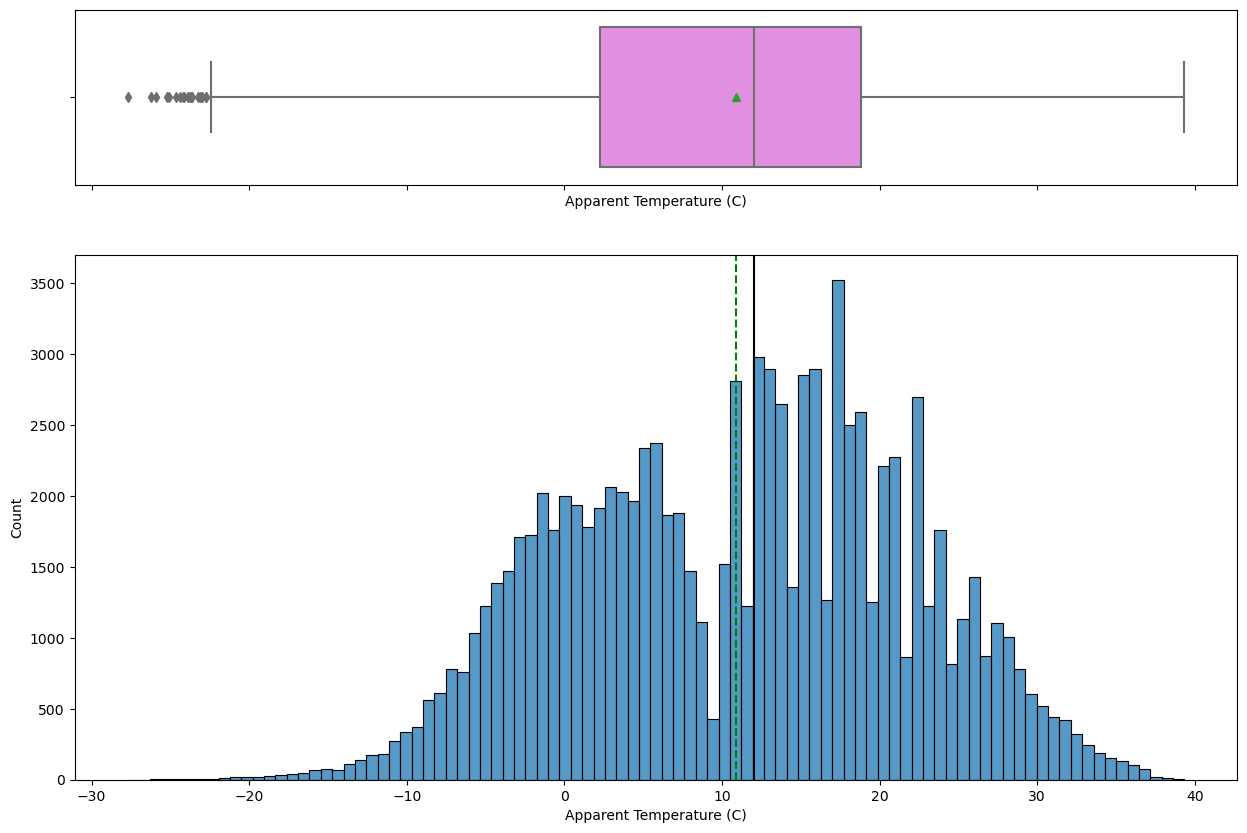

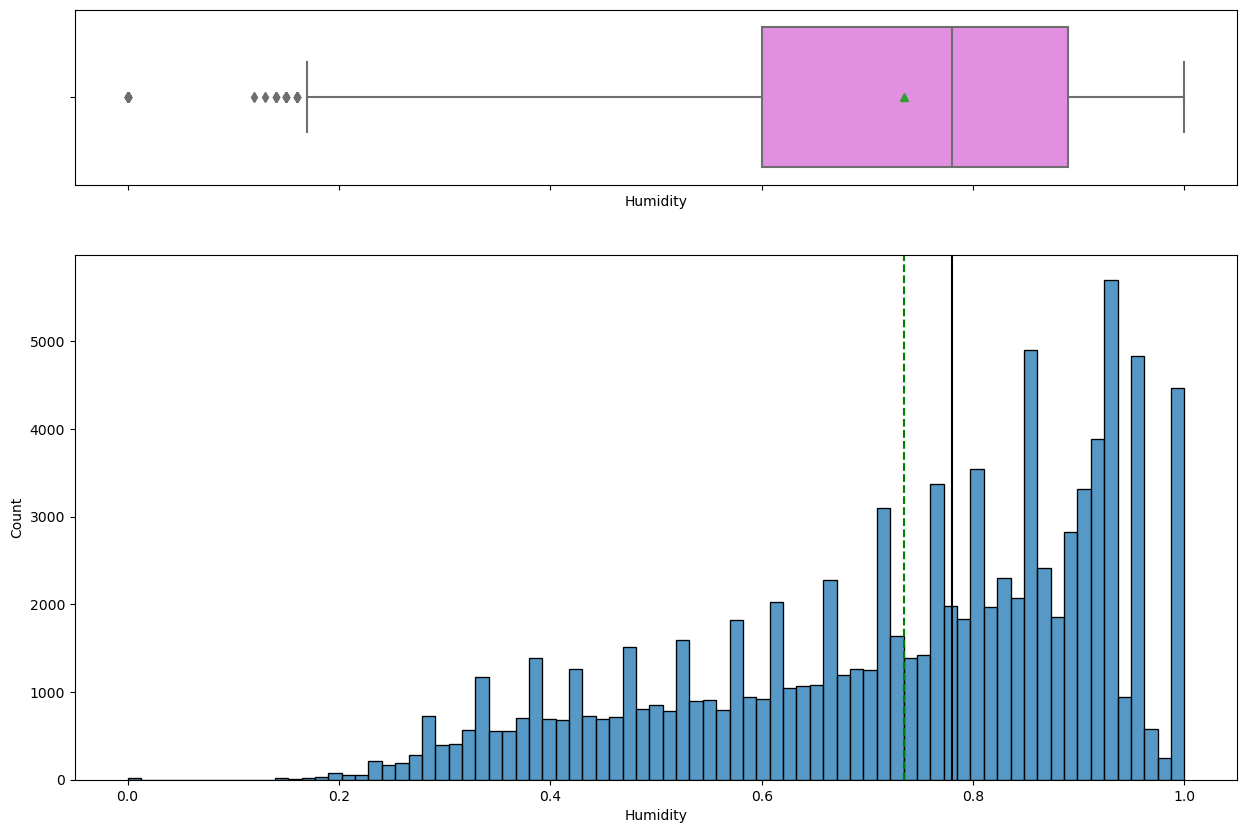

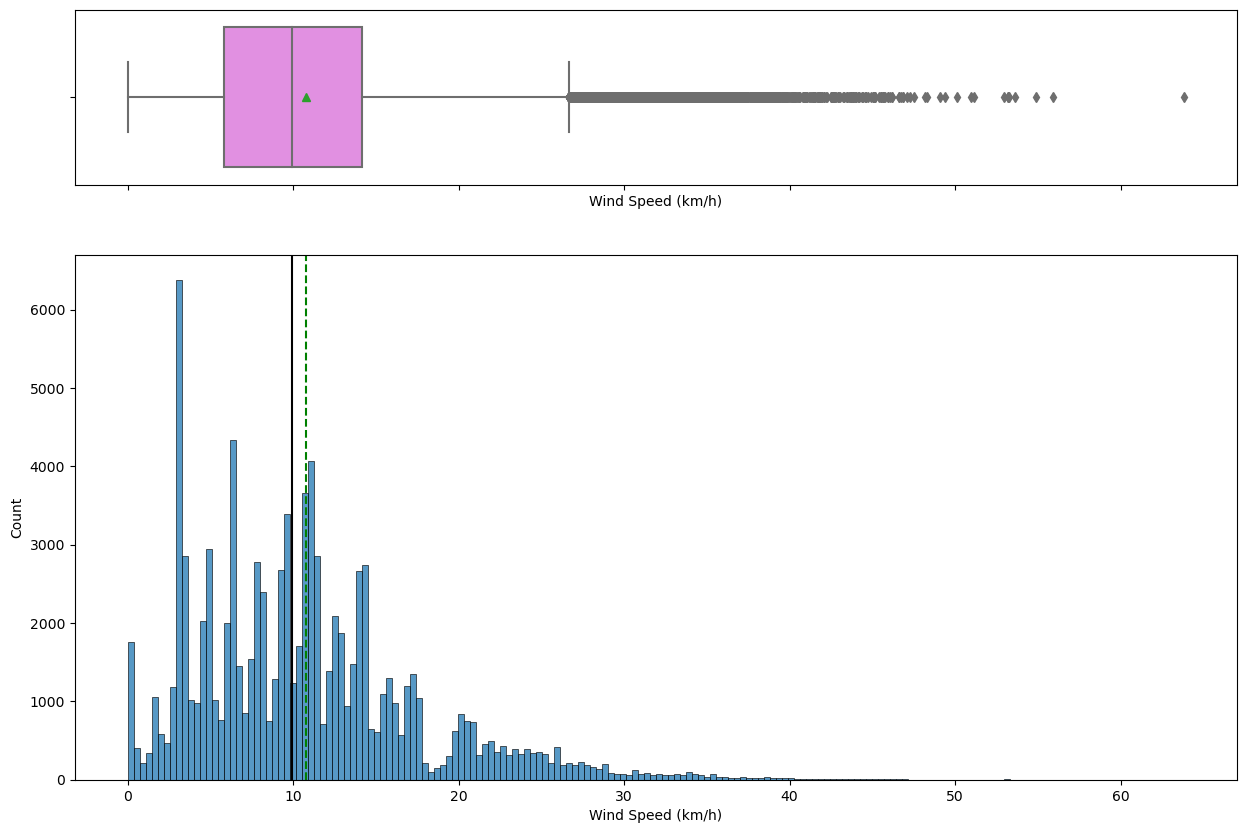

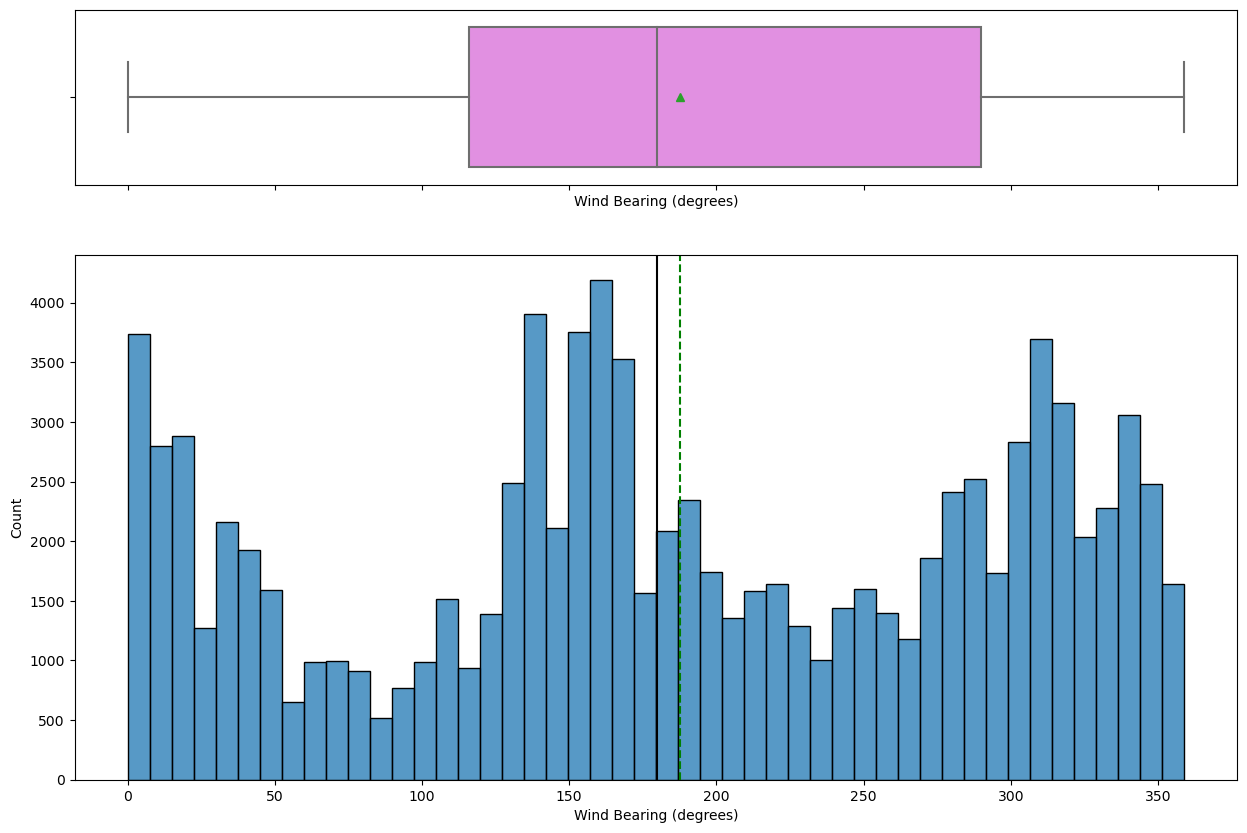

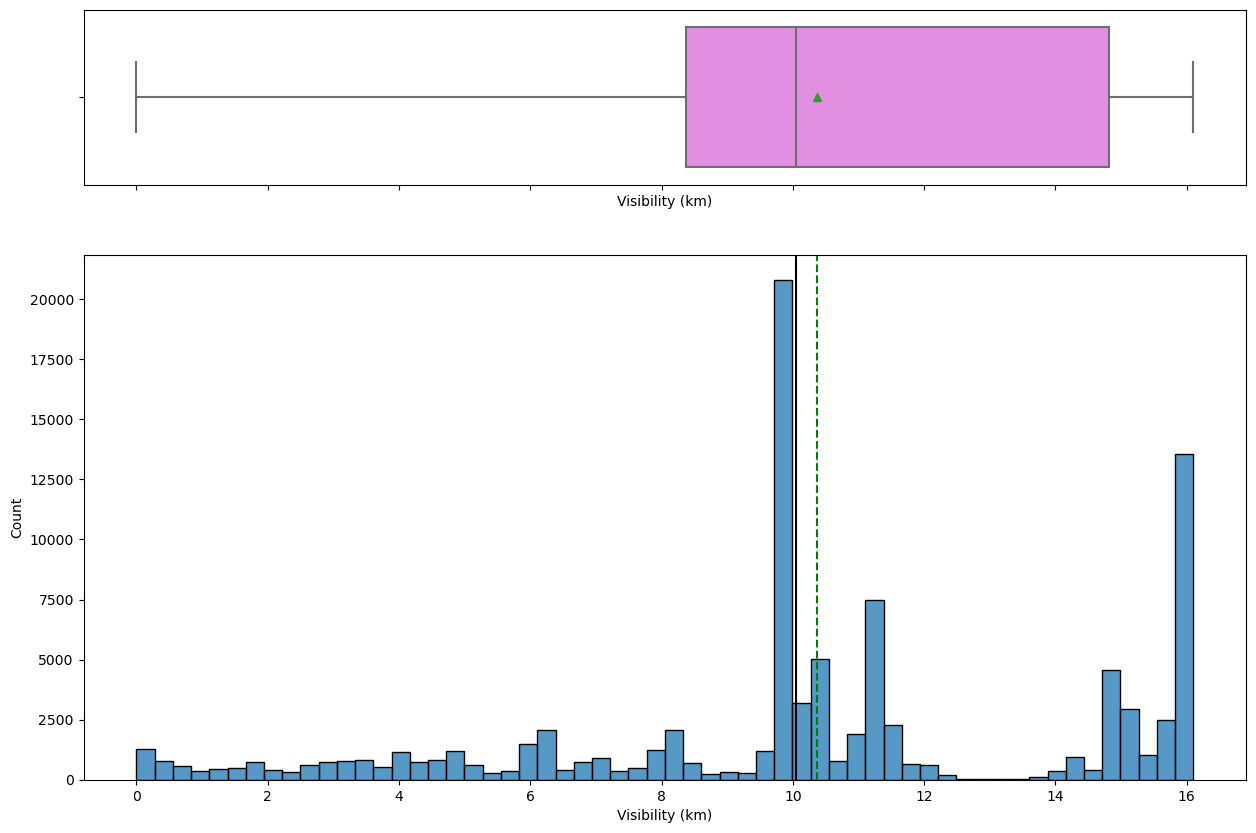

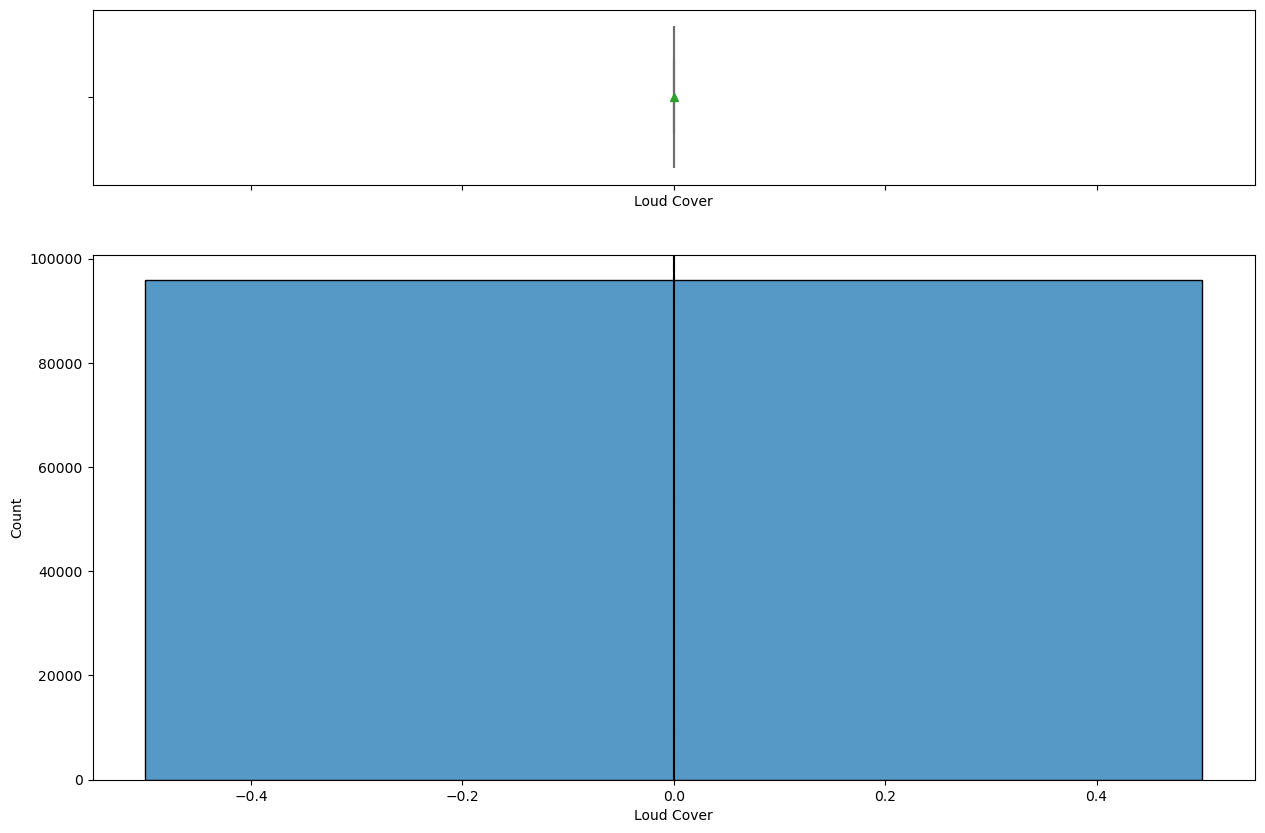

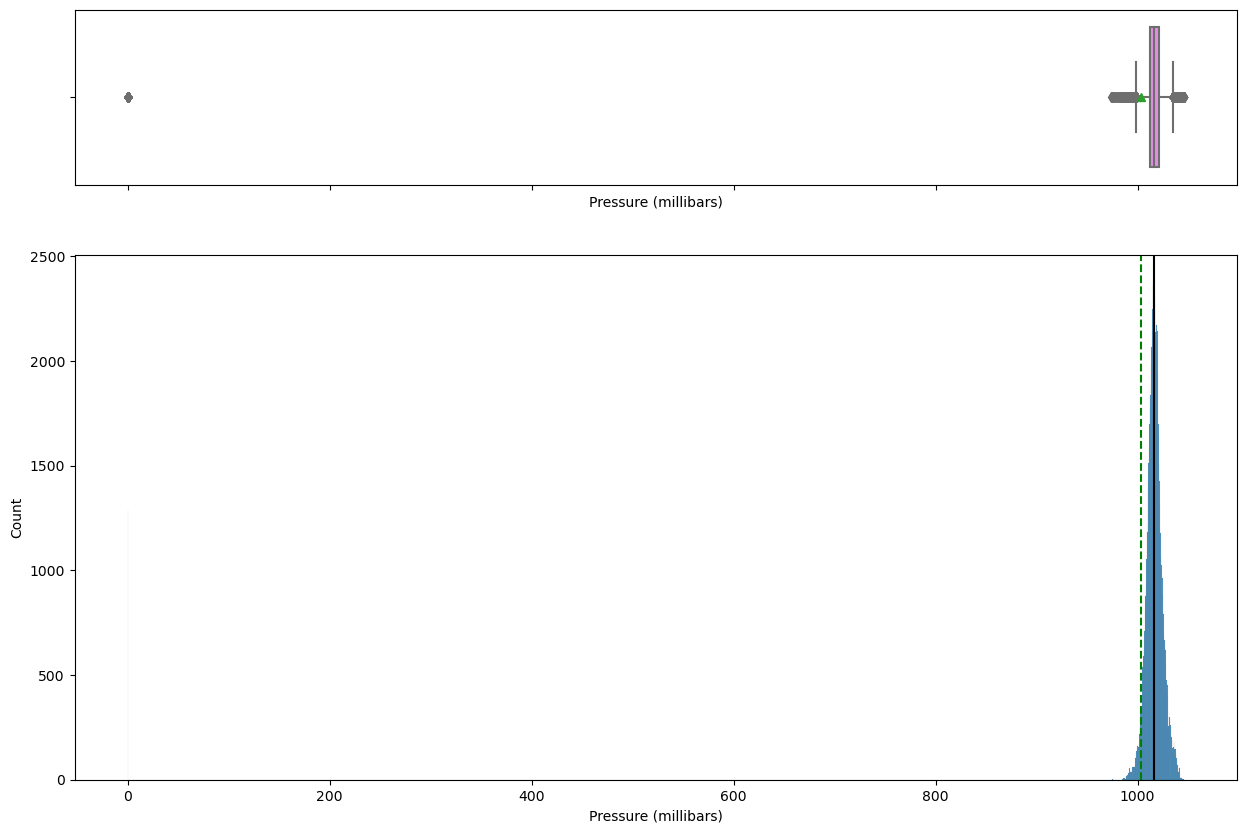

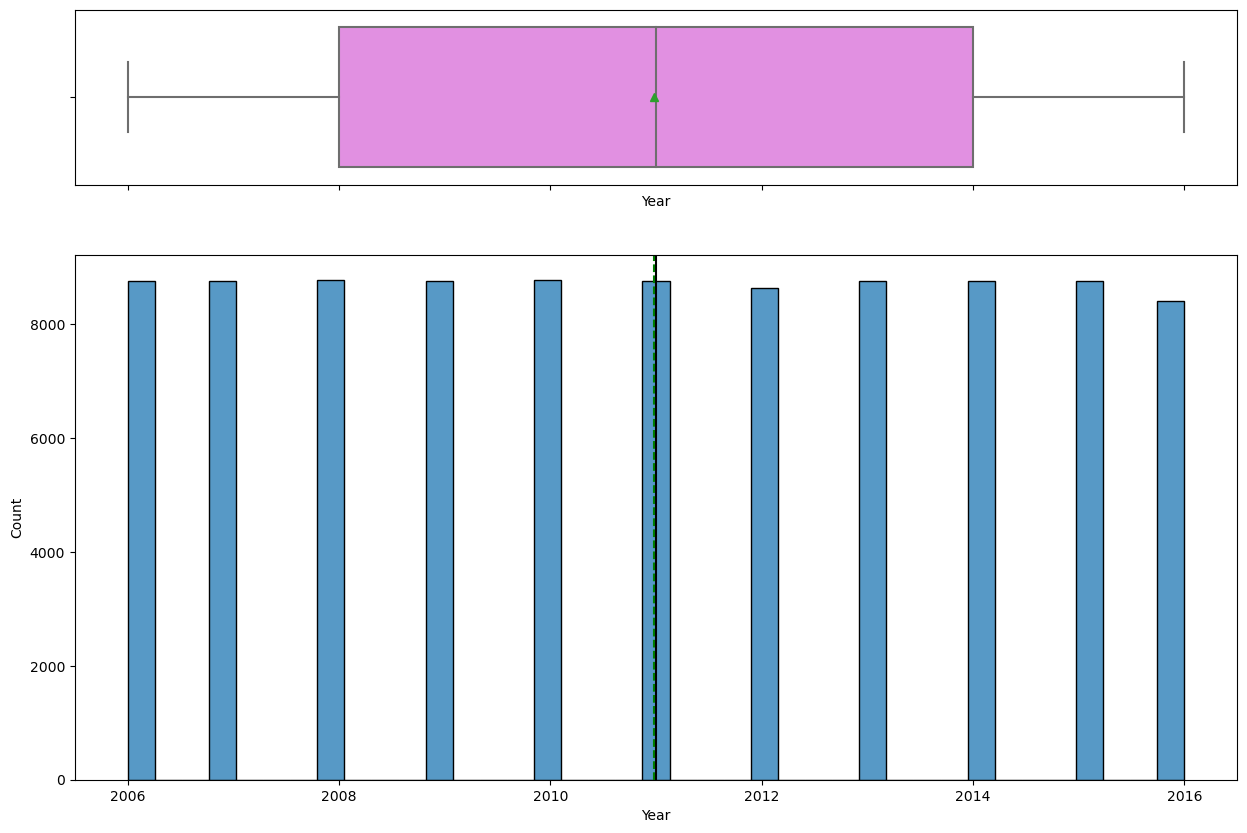

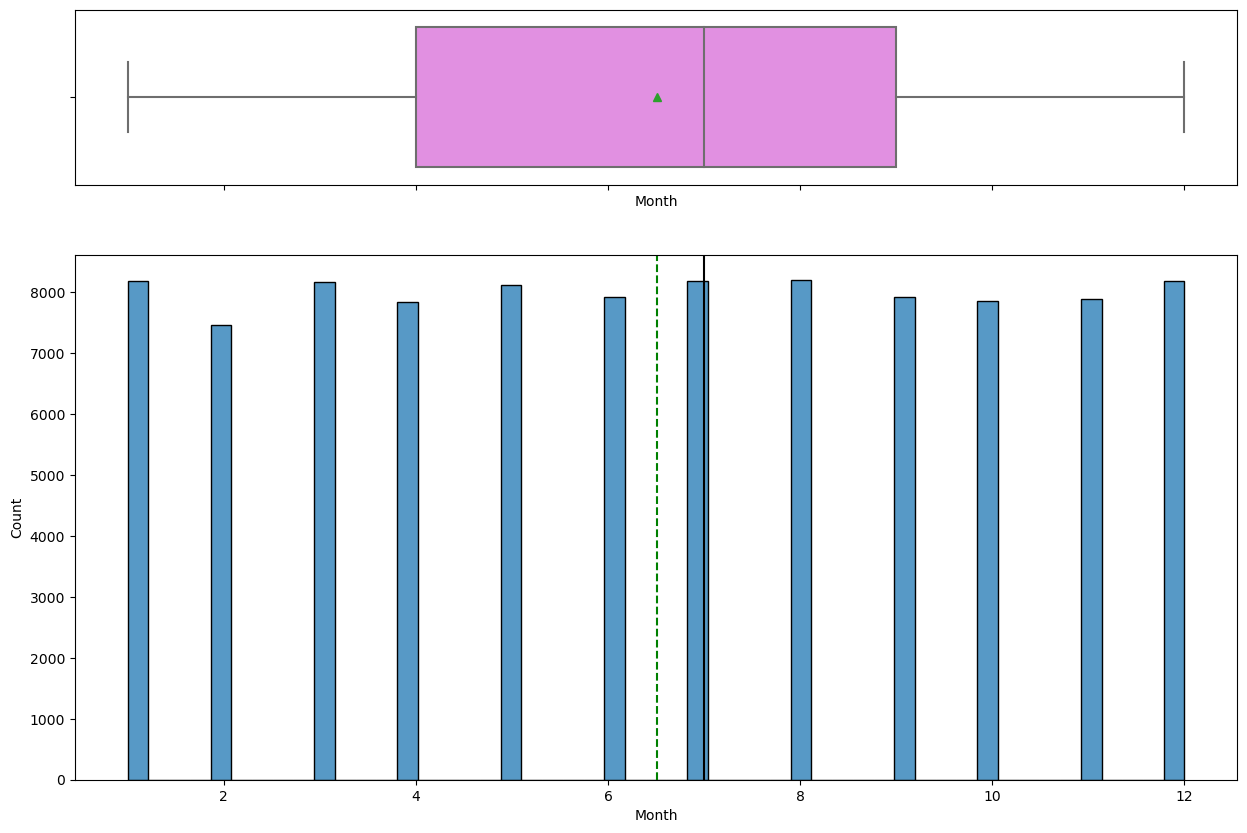

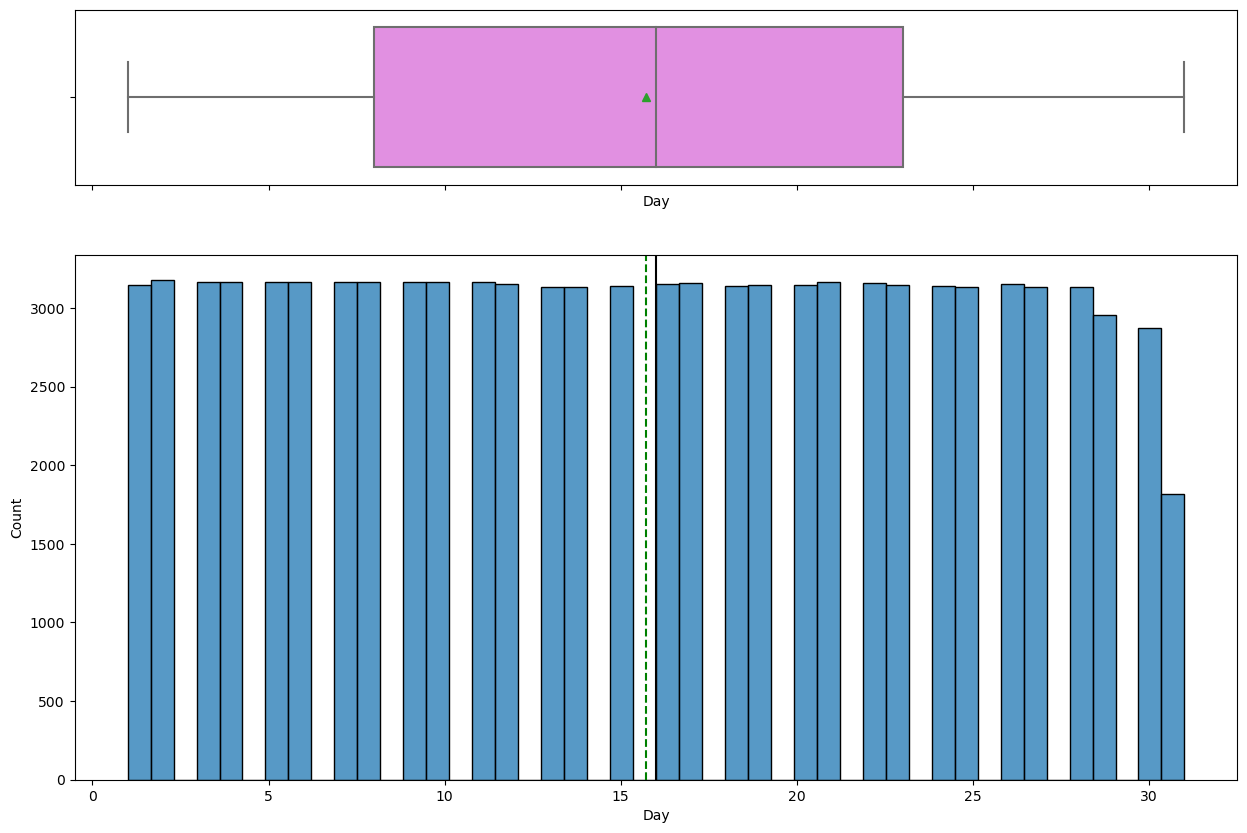

In [15]:
for i in numeric_columns:
    histogram_boxplot(data,i)

<Axes: xlabel='count', ylabel='Summary'>

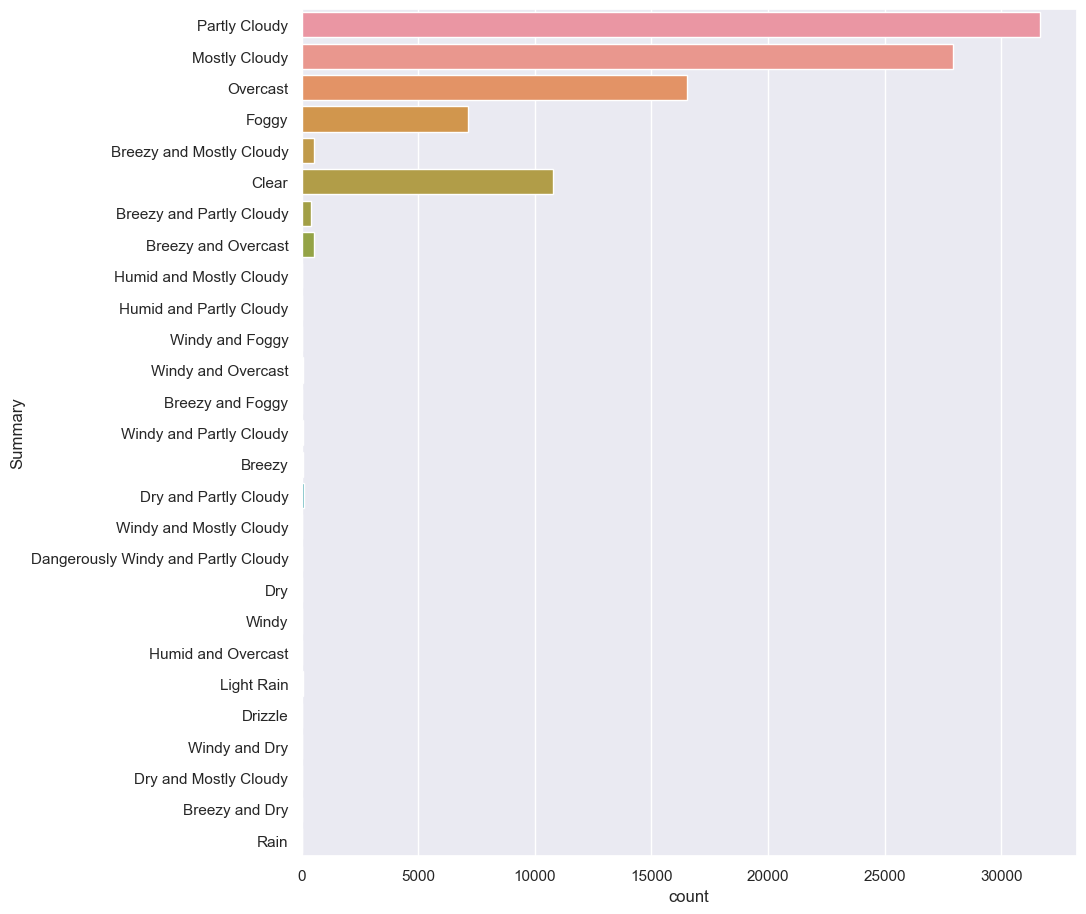

In [16]:
sns.set(rc={'figure.figsize':(10,11)})
sns.countplot(y = data['Summary'])

In [17]:
data = data[(data["Summary"] == "Overcast") | (data["Summary"] == "Clear") | (data["Summary"] == "Foggy")]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34396 entries, 46 to 96436
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Formatted Date            34396 non-null  object        
 1   Summary                   34396 non-null  object        
 2   Temperature (C)           34396 non-null  float64       
 3   Apparent Temperature (C)  34396 non-null  float64       
 4   Humidity                  34396 non-null  float64       
 5   Wind Speed (km/h)         34396 non-null  float64       
 6   Wind Bearing (degrees)    34396 non-null  float64       
 7   Visibility (km)           34396 non-null  float64       
 8   Loud Cover                34396 non-null  float64       
 9   Pressure (millibars)      34396 non-null  float64       
 10  Daily Summary             34396 non-null  object        
 11  Date                      34396 non-null  datetime64[ns]
 12  Year             

In [18]:
le = LabelEncoder()
encoded = le.fit_transform(data['Summary'])
print(encoded) # 0 : Clear, 1 : Foggy , 2 : Overcast

[2 2 2 ... 0 0 0]


In [19]:
data.drop("Summary", axis=1, inplace=True)
data["Summary"] = encoded 

In [20]:
print("Duplicated Values: ",data.duplicated().sum())

Duplicated Values:  17


In [21]:
data.drop_duplicates(inplace=True)
print("Duplicated Values: ", data.duplicated().sum())

Duplicated Values:  0


# From the above data we can get the past weather information and using machine learning classifications algorithms such as Random Forest, Decision Trees, Support Vector Machines(SVM) and Stochastic Gradient Descent we can predict weather information.

## Random Forest

In [22]:
data = data.drop(['Formatted Date','Temperature (C)','Daily Summary','Date'], axis=1)

In [23]:
X = data.drop('Summary', axis=1)
y = data['Summary'] 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [26]:
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [27]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # Initialize the Random Forest classifier

In [28]:
rf_classifier.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [29]:
y_pred = rf_classifier.predict(X_test)

In [30]:
# model's accuracy, precision, recall,f1
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1: {f1:.2f}")

Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1: 0.94


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      2172
           1       1.00      1.00      1.00      1431
           2       0.93      0.95      0.94      3273

    accuracy                           0.94      6876
   macro avg       0.95      0.95      0.95      6876
weighted avg       0.94      0.94      0.94      6876



In [32]:
def predict_weather(temperature,humidity,wind_speed, wind_Bearing,Visibility,Loud_cover,Pressure,Year,Month,Day,Precip_type):
    user_data = np.array([[temperature,humidity,wind_speed,wind_Bearing,Visibility,Loud_cover,Pressure,Year,Month,Day,Precip_type]])
    predicted_weather = rf_classifier.predict(user_data)
    return predicted_weather[0]

In [33]:
user_temperature = 9  
user_humidity = 0.8
user_wind_speed = 3.9 
user_wind_bearing = 159
user_Visibility = 15.82
user_Loud_cover = 0.0
user_Pressure = 1007.85
user_Year = 2006
user_Month = 4
user_Day = 10
user_Precip_type = 0

predicted_weather_label = predict_weather(user_temperature, user_humidity, user_wind_speed,
                                          user_wind_bearing, user_Visibility, user_Loud_cover,
                                          user_Pressure, user_Year, user_Month, user_Day,user_Precip_type)
print(f"Predicted Weather: {predicted_weather_label}")

Predicted Weather: 2


## We use target variable "Summary" and we get 94% accuaracy which proves a good model for prediction.

# Decision Tree

In [34]:
X = data.drop('Summary', axis=1)
y = data['Summary'] 

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [37]:
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [38]:
dt_classifier = DecisionTreeClassifier(random_state=42)

In [39]:
dt_classifier.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [40]:
y_pred = dt_classifier.predict(X_test)

In [41]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1: {f1:.2f}")

Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1: 0.89


In [42]:
def predict_weather(temperature,humidity,wind_speed, wind_Bearing,Visibility,Loud_cover,Pressure,Year,Month,Day,Precip_type):
    user_data = np.array([[temperature,humidity, wind_speed, wind_Bearing,Visibility,Loud_cover,Pressure,Year,Month,Day,Precip_type]])
    predicted_weather = rf_classifier.predict(user_data)
    return predicted_weather[0]

In [43]:
user_temperature = 9  
user_humidity = 0.8
user_wind_speed = 3.9 
user_wind_bearing = 159
user_Visibility = 15.82
user_Loud_cover = 0.0
user_Pressure = 1007.85
user_Year = 2006
user_Month = 4
user_Day = 10
user_Precip_type = 0

predicted_weather_label = predict_weather(user_temperature, user_humidity, user_wind_speed,
                                          user_wind_bearing, user_Visibility, user_Loud_cover,
                                          user_Pressure, user_Year, user_Month, user_Day,user_Precip_type)
print(f"Predicted Weather: {predicted_weather_label}")

Predicted Weather: 2


# Support Vector Machine(SVM)

In [44]:
X = data.drop('Summary', axis=1)
y = data['Summary'] 

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [47]:
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [48]:
svm_classifier = SVC(kernel='linear', random_state=42)

In [49]:
svm_classifier.fit(X_train_resampled, y_train_resampled)

SVC(kernel='linear', random_state=42)

In [50]:
y_pred = svm_classifier.predict(X_test)

In [51]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1: {f1:.2f}")

Accuracy: 0.80
Precision: 0.80
Recall: 0.80
F1: 0.80


In [52]:
def predict_weather(temperature,humidity,wind_speed, wind_Bearing,Visibility,Loud_cover,Pressure,Year,Month,Day,Precip_type):
    user_data = np.array([[temperature,humidity, wind_speed, wind_Bearing,Visibility,Loud_cover,Pressure,Year,Month,Day,Precip_type]])
    predicted_weather = rf_classifier.predict(user_data)
    return predicted_weather[0]

In [53]:
user_temperature = 9  
user_humidity = 0.8
user_wind_speed = 3.9 
user_wind_bearing = 159
user_Visibility = 15.82
user_Loud_cover = 0.0
user_Pressure = 1007.85
user_Year = 2006
user_Month = 4
user_Day = 10
user_Precip_type = 0

predicted_weather_label = predict_weather(user_temperature, user_humidity, user_wind_speed,
                                          user_wind_bearing, user_Visibility, user_Loud_cover,
                                          user_Pressure, user_Year, user_Month, user_Day,user_Precip_type)
print(f"Predicted Weather: {predicted_weather_label}")

Predicted Weather: 2


# Stochastic Gradient Descent (SGD)

In [54]:
X = data.drop('Summary', axis=1)
y = data['Summary']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [57]:
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [58]:
sgd_classifier = SGDClassifier(loss='hinge', random_state=42)

In [59]:
sgd_classifier.fit(X_train_resampled, y_train_resampled)

SGDClassifier(random_state=42)

In [60]:
y_pred = sgd_classifier.predict(X_test)

In [61]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1: {f1:.2f}")

Accuracy: 0.75
Precision: 0.77
Recall: 0.75
F1: 0.74


In [62]:
def predict_weather(temperature,humidity,wind_speed, wind_Bearing,Visibility,Loud_cover,Pressure,Year,Month,Day,Precip_type):
    user_data = np.array([[temperature,humidity, wind_speed, wind_Bearing,Visibility,Loud_cover,Pressure,Year,Month,Day,Precip_type]])
    predicted_weather = rf_classifier.predict(user_data)
    return predicted_weather[0]

In [63]:
user_temperature = 9  
user_humidity = 0.8
user_wind_speed = 3.9 
user_wind_bearing = 159
user_Visibility = 15.82
user_Loud_cover = 0.0
user_Pressure = 1007.85
user_Year = 2006
user_Month = 4
user_Day = 10
user_Precip_type = 0

predicted_weather_label = predict_weather(user_temperature, user_humidity, user_wind_speed,
                                          user_wind_bearing, user_Visibility, user_Loud_cover,
                                          user_Pressure, user_Year, user_Month, user_Day,user_Precip_type)
print(f"Predicted Weather: {predicted_weather_label}")

Predicted Weather: 2


# Hence we can conclude from the above four algorithm Random forest and Decison tree will give best model. Also, it does not overfit the model.

# In above code we use oversample and standardscalre to mornalize the data and we can get accuarte results. Before that model was giving accuracy of 40-50 % but after normalization it gives 80-90 % which means model now does not underfit or overfit. 